In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#from api_keys import api_key

api_key = "6fd03fc8e9efe397ed1cc3d4205e173e"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [102]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=20)
lngs = np.random.uniform(low=-180.000, high=180.000, size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

20

In [103]:
cities

['abu kamal',
 'castro',
 'nalut',
 'serenje',
 'busselton',
 'hobart',
 'la ronge',
 'punta arenas',
 'komsomolskiy',
 'barrow',
 'taolanaro',
 'east london',
 'nagtipunan',
 'abha',
 'tuktoyaktuk',
 'atuona',
 'bluff',
 'khatanga',
 'lavrentiya',
 'cayenne']

In [135]:
city_df=pd.DataFrame(cities)
#city_df
new_city_df=city_df.rename(columns={0:"City"})
#new_city_df

In [105]:
new_city_df['Cloudiness']=""
new_city_df['Country']=""
new_city_df['Date']=""
new_city_df['Humidity']=""
new_city_df['Lat']=""
new_city_df['Lng']=""
new_city_df['Max Temp']=""
new_city_df['Wind Speed']=""

new_city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,abu kamal,,,,,,,,
1,castro,,,,,,,,
2,nalut,,,,,,,,
3,serenje,,,,,,,,
4,busselton,,,,,,,,


In [106]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [107]:
query_url=f"{url}appid={api_key}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=6fd03fc8e9efe397ed1cc3d4205e173e&q=


In [108]:
#city_name=[]
#country=[]
#lat=[]
#lng=[]
#date=[]
#cloudiness=[]
#humidity=[]
#max_temp=[]
#wind_speed=[]

#for city in cities:
    #response=requests.get(query_url + city).json()
    #try:
        #print(f"Processing Record {index} of Set [1]| {city_name}")
        #city_name=response["name"]
        #country=response["sys"]["country"]
        #lat=response["coord"]["lat"]
        #lng=response["coord"]["lon"]
        #date=response["dt"]
        #cloudiness=response["clouds"]["all"]
        #humidity=response["main"]["humidity"]
        #wind_speed=response["wind"]["speed"]
    #except (KeyError):
        #print("City not found. Skipping...")

In [119]:
city_name=[]
country=[]
lat=[]
lng=[]
date=[]
cloudiness=[]
humidity=[]
max_temp=[]
wind_speed=[]

print("Beginning Data Retrieval")
print("-------------------------------")

for index, row in new_city_df.iterrows():
    city_stats=row['City']
    
    print(f"Processing Record {index} of Set {row} | {city_stats}")
    try:
        ##print(f"Processing Record {index} of Set {row}| {city_name}")
        response=requests.get(query_url + city_stats+"&units=imperial").json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        date.append(response["dt"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        max_temp.append(response["main"]["temp_max"])
    except (KeyError):
        print("City not found. Skipping...")

Beginning Data Retrieval
-------------------------------
Processing Record 0 of Set City          abu kamal
Cloudiness             
Country                
Date                   
Humidity               
Lat                    
Lng                    
Max Temp               
Wind Speed             
Name: 0, dtype: object | abu kamal
Processing Record 1 of Set City          castro
Cloudiness          
Country             
Date                
Humidity            
Lat                 
Lng                 
Max Temp            
Wind Speed          
Name: 1, dtype: object | castro
Processing Record 2 of Set City          nalut
Cloudiness         
Country            
Date               
Humidity           
Lat                
Lng                
Max Temp           
Wind Speed         
Name: 2, dtype: object | nalut
Processing Record 3 of Set City          serenje
Cloudiness           
Country              
Date                 
Humidity             
Lat                  
Lng                 

In [120]:
#city_name

['Abu Kamal',
 'Castro',
 'Nalut',
 'Serenje',
 'Busselton',
 'Hobart',
 'La Ronge',
 'Punta Arenas',
 'Komsomolskiy',
 'Barrow',
 'East London',
 'Nagtipunan',
 'Abha',
 'Tuktoyaktuk',
 'Atuona',
 'Bluff',
 'Khatanga',
 'Lavrentiya',
 'Cayenne']

In [128]:
#city_name=[]
#country=[]
#lat=[]
#lng=[]
#date=[]
#cloudiness=[]
#humidity=[]
#max_temp=[]
#wind_speed=[]

#print("Beginning Data Retrieval")
#print("-------------------------------")

#for city in cities:
    #print(f"Processing Record {index} of Set {row} | {city}")
    #try:
        #response=requests.get(query_url + city+ "&units=imperial").json()
        #city_name.append(response["name"])
        #country.append(response["sys"]["country"])
        #lat.append(response["coord"]["lat"])
        #lng.append(response["coord"]["lon"])
        #date.append(response["dt"])
        #cloudiness.append(response["clouds"]["all"])
        #humidity.append(response["main"]["humidity"])
        #wind_speed.append(response["wind"]["speed"])
        #max_temp.append(response["main"]["temp_max"])
    #except (KeyError):
        #print("City not found. Skipping...")
    
#for city in cities:
    #response=requests.get(query_url + city + "&units=imperial").json()
    #max_temp.append(response["main"]["temp_max"])

In [129]:
weather_dict= {
    "City": city_name, 
    "Country": country,
    "Lat": lat,
    "Lng": lng,
    "Date": date,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed}

weather_data=pd.DataFrame(weather_dict)
weather_data.to_csv("Weather_Data.csv", index=False)


In [125]:
#for index, row in weather_data.itterows():
    #city_df=row['City']
    #print(f"Processing Record {index} of Set [1]| {city_name}")
    #city_df

In [126]:
weather_data.count()

City          19
Country       19
Lat           19
Lng           19
Date          19
Cloudiness    19
Humidity      19
Max Temp      19
Wind Speed    19
dtype: int64

In [140]:
weather_data.head()

,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Abu Kamal,SY,34.45,40.92,1559167604,0,10,92.96,7.94
1,Castro,CL,-42.48,-73.76,1559167681,75,75,46.40,4.38
2,Nalut,LY,31.86,10.98,1559167681,0,40,74.78,20.80
3,Serenje,ZM,-13.23,30.22,1559167681,0,75,54.80,4.81
4,Busselton,AU,-33.64,115.35,1559167681,0,50,53.01,28.66
5,Hobart,AU,-42.88,147.33,1559167456,75,70,43.00,8.05
6,La Ronge,CA,55.10,-105.30,1559167682,90,45,64.40,13.87
7,Punta Arenas,CL,-53.16,-70.91,1559167923,0,80,41.00,9.17
8,Komsomolskiy,RU,67.55,63.78,1559167682,3,95,19.88,7.99
9,Barrow,AR,-38.31,-60.23,1559167731,97,64,48.32,4.43


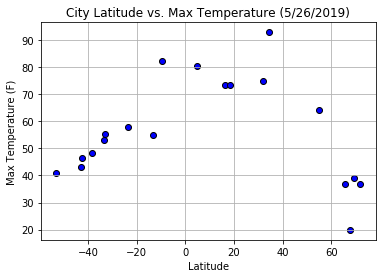

<Figure size 432x288 with 0 Axes>

In [136]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker='o', facecolors="blue", edgecolors="black")

plt.grid(True)
plt.title("City Latitude vs. Max Temperature (5/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.show()
plt.savefig("Lat vs. Temp Plot.png")

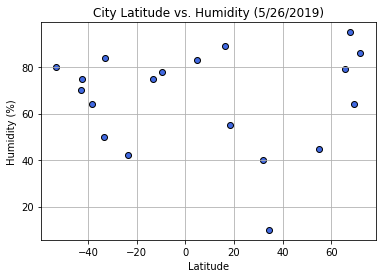

<Figure size 432x288 with 0 Axes>

In [137]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker='o', facecolors="royalblue", edgecolors="black")

plt.grid(True)
plt.title("City Latitude vs. Humidity (5/26/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()
plt.savefig("Lat vs. Humidity.png")

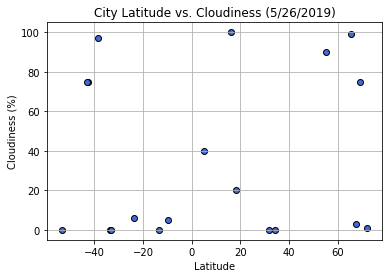

<Figure size 432x288 with 0 Axes>

In [138]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker='o', facecolors="royalblue", edgecolors="black")

plt.grid(True)
plt.title("City Latitude vs. Cloudiness (5/26/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()
plt.savefig("Lat vs. Cloudiness Plot.png")

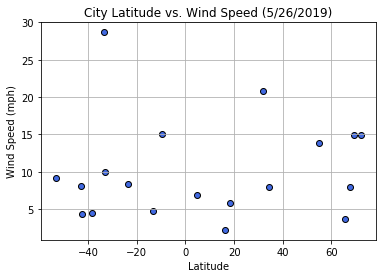

<Figure size 432x288 with 0 Axes>

In [139]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker='o', facecolors="royalblue", edgecolors="black")

plt.grid(True)
plt.title("City Latitude vs. Wind Speed (5/26/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()
plt.savefig("Lat vs. Wind Speed.png")